##                                          Introduction to Gene Family Classifcation from DNA Sequence using Machine Learning Techniques

## Problem Description:

DNA (Deoxyribonucleic acid) is a complex, long-chained molecule that encodes the genetic characteristics of a living organism.It is like  the language of life. The language encodes instructions as well as function for the molecules that are found in all life forms. The sequence language analogy continues with the genome as the book, subsequences (genes and gene families) are sentences and chapters, k-mers and peptides (motifs) are words, and nucleotide bases and amino acids are the alphabet. Since the analogy seems so apt, it stands to reason that the amazing work done in the NLP field can also apply to the natural language of DNA and protein sequences.

In this Notebook ,Lets Explore about how Machine Learning Techniques for Text can be used for Genomes

##### Importing Necessary Libraries for analysis

In [1]:
import pandas as pd
import numpy as np
import Bio
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import Image
sns.set()

In [2]:
humandata = pd.read_table('../input/human-dna-sequences/human_data.txt')
humandata.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [3]:
humandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sequence  4380 non-null   object
 1   class     4380 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 68.6+ KB


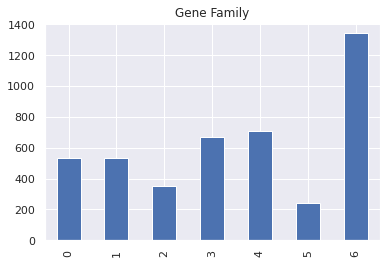

In [4]:
## 4380 Sequences are there
humandata['class'].value_counts().sort_index().plot.bar()
plt.title("Gene Family")
plt.show()

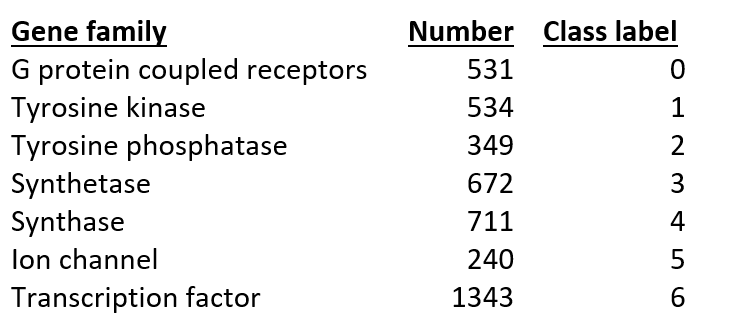

In [5]:
Image('../input/human-dna-sequences/_results_.png')

From the the Target value distribution analysis ,We can infer that the data is somewhat skewed (Transciption factor is almost double the times of Tyrosine kinase).

For now ,Lets proceed with normal techniques and if they dont provide us good results them we can consider the sampling techniques like Oversampling,Undersampling,SMOTE for balancing the number of samples of different gene family in the target 

In [6]:
display(humandata["sequence"][0])

print(f'length of Sequence 1 : {len(humandata["sequence"][0])}')

'ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCCTTACACTATTCCTCATCACCCAACTAAAAATATTAAACACAAACTACCACCTACCTCCCTCACCAAAGCCCATAAAAATAAAAAATTATAACAAACCCTGAGAACCAAAATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG'

length of Sequence 1 : 207


#### Now Lets use the Bio Library and explore its basic capabilites

In [7]:
from Bio.Seq import Seq
my_seq = Seq(humandata["sequence"][0])
print(my_seq)

ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCCTTACACTATTCCTCATCACCCAACTAAAAATATTAAACACAAACTACCACCTACCTCCCTCACCAAAGCCCATAAAAATAAAAAATTATAACAAACCCTGAGAACCAAAATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG


In [8]:
print(f" Complement : {my_seq.complement()} \n")
print(f"Reverse Complement :  {my_seq.reverse_complement()} " )

 Complement : TACGGGGTTGATTTATGATGGCATACCGGGTGGTATTAATGGGGGTATGAGGAATGTGATAAGGAGTAGTGGGTTGATTTTTATAATTTGTGTTTGATGGTGGATGGAGGGAGTGGTTTCGGGTATTTTTATTTTTTAATATTGTTTGGGACTCTTGGTTTTACTTGCTTTTAGACAAGCGAAGTAAGTAACGGGGGTGTTAGGATC 

Reverse Complement :  CTAGGATTGTGGGGGCAATGAATGAAGCGAACAGATTTTCGTTCATTTTGGTTCTCAGGGTTTGTTATAATTTTTTATTTTTATGGGCTTTGGTGAGGGAGGTAGGTGGTAGTTTGTGTTTAATATTTTTAGTTGGGTGATGAGGAATAGTGTAAGGAGTATGGGGGTAATTATGGTGGGCCATACGGTAGTATTTAGTTGGGGCAT 


#### The GC Content of a DNA sequence is important and relates to how stable the molecule will be

In [9]:
from Bio.SeqUtils import GC
print("GC% :\t" + str(GC(my_seq)))

GC% :	39.61352657004831


In [10]:
humandata["length"] = humandata.sequence.apply(lambda x : len(x))  # finding the length of each DNA Sequence

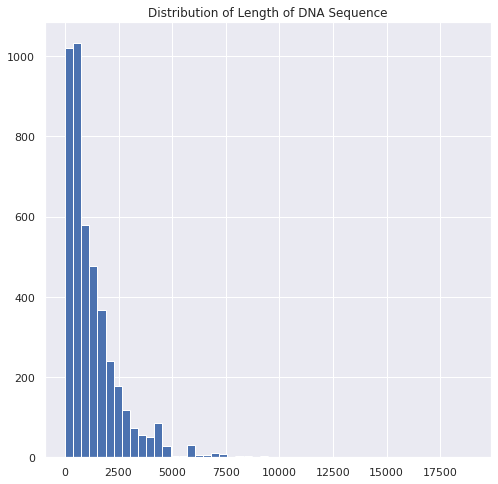

In [11]:
plt.figure(figsize=(8,8));
plt.hist(humandata["length"],bins=50)
plt.title("Distribution of Length of DNA Sequence");

Length of the Sequence varies alot .we have to find a way to make it as constant so that we can apply ML Techniques to this problem

We can use K-mer method to rectify this issue. We can take a long biological sequence and break it down into k-mer length overlapping “words”. For example, if we use words of length 6 (hexamers), “ATGCATGCA” becomes: ‘ATGCAT’, ‘TGCATG’, ‘GCATGC’, ‘CATGCA’. Hence our example sequence is broken down into 4 hexamer words.

In genomics, we refer to these types of manipulations as "**k-mer counting**", or counting the occurances of each possible k-mer sequence.

In [12]:
def getKmers(sequence, size=6):
    return [sequence[x:x+size].upper() for x in range(len(sequence) - size + 1)]

In [13]:
#Now we can convert our training data sequences into short overlapping k-mers of legth 6.

humandata['words'] = humandata.apply(lambda x: getKmers(x['sequence']), axis=1)

In [14]:
humandata.head()

,sequence,class,length,words
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4,207,"[ATGCCC, TGCCCC, GCCCCA, CCCCAA, CCCAAC, CCAAC..."
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4,681,"[ATGAAC, TGAACG, GAACGA, AACGAA, ACGAAA, CGAAA..."
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,1686,"[ATGTGT, TGTGTG, GTGTGG, TGTGGC, GTGGCA, TGGCA..."
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,1206,"[ATGTGT, TGTGTG, GTGTGG, TGTGGC, GTGGCA, TGGCA..."
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3,1437,"[ATGCAA, TGCAAC, GCAACA, CAACAG, AACAGC, ACAGC..."


### Since we are going to use scikit-learn natural language processing tools to do the k-mer counting, we need to now convert the lists of k-mers for each gene into string sentences of words that the count vectorizer can use.

In [15]:
#We are now going to Convert the words into string and then apply Count Vectorizer

humandata["in_string"] =humandata["words"].apply(lambda x:  ' '.join(x))

In [16]:
humandata[["words","in_string"]]

,words,in_string
0,"[ATGCCC, TGCCCC, GCCCCA, CCCCAA, CCCAAC, CCAAC...",ATGCCC TGCCCC GCCCCA CCCCAA CCCAAC CCAACT CAAC...
1,"[ATGAAC, TGAACG, GAACGA, AACGAA, ACGAAA, CGAAA...",ATGAAC TGAACG GAACGA AACGAA ACGAAA CGAAAA GAAA...
2,"[ATGTGT, TGTGTG, GTGTGG, TGTGGC, GTGGCA, TGGCA...",ATGTGT TGTGTG GTGTGG TGTGGC GTGGCA TGGCAT GGCA...
3,"[ATGTGT, TGTGTG, GTGTGG, TGTGGC, GTGGCA, TGGCA...",ATGTGT TGTGTG GTGTGG TGTGGC GTGGCA TGGCAT GGCA...
4,"[ATGCAA, TGCAAC, GCAACA, CAACAG, AACAGC, ACAGC...",ATGCAA TGCAAC GCAACA CAACAG AACAGC ACAGCA CAGC...
...,...,...
4375,"[ATGGAA, TGGAAG, GGAAGA, GAAGAT, AAGATT, AGATT...",ATGGAA TGGAAG GGAAGA GAAGAT AAGATT AGATTT GATT...
4376,"[ATGCAG, TGCAGT, GCAGTC, CAGTCC, AGTCCT, GTCCT...",ATGCAG TGCAGT GCAGTC CAGTCC AGTCCT GTCCTT TCCT...
4377,"[ATGCAG, TGCAGT, GCAGTC, CAGTCC, AGTCCT, GTCCT...",ATGCAG TGCAGT GCAGTC CAGTCC AGTCCT GTCCTT TCCT...
4378,"[ATGGGG, TGGGGC, GGGGCA, GGGCAC, GGCACC, GCACC...",ATGGGG TGGGGC GGGGCA GGGCAC GGCACC GCACCT CACC...


In [17]:
y=humandata.loc[:,'class'].values

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(humandata["in_string"])

In [19]:
print(X.shape)

(4380, 232414)


In [20]:
#This is the Count_Vectorizer's Vocabulary
i=0
for key,value in cv.vocabulary_.items():
    print(f"{key} : {value}")
    i+=1
    if i>10:break

atgccc tgcccc gcccca ccccaa : 52803
tgcccc gcccca ccccaa cccaac : 207969
gcccca ccccaa cccaac ccaact : 136621
ccccaa cccaac ccaact caacta : 79202
cccaac ccaact caacta aactaa : 78295
ccaact caacta aactaa actaaa : 74681
caacta aactaa actaaa ctaaat : 60650
aactaa actaaa ctaaat taaata : 6563
actaaa ctaaat taaata aaatac : 25724
ctaaat taaata aaatac aatact : 101750
taaata aaatac aatact atacta : 176196


In [21]:
from sklearn.model_selection import StratifiedKFold,cross_val_score,cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import *

In [22]:
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1

In [23]:
print("Decision Classifier :")
for i,(train_index,val_index)  in enumerate(StratifiedKFold(n_splits=5,shuffle=True,random_state=42).split(X,y)):
    dt =DecisionTreeClassifier()
    dt.fit(X[train_index],y[train_index])
    pred=dt.predict(X[val_index])
    accuracy, precision, recall, f1 = get_metrics(y[val_index], pred)
    print(str(i)+" Iteration : Accuracy = %.5f     F1_Score = %.5f" % (accuracy, f1))

Decision Classifier :
0 Iteration : Accuracy = 0.80137     F1_Score = 0.80706
1 Iteration : Accuracy = 0.83105     F1_Score = 0.83284
2 Iteration : Accuracy = 0.81164     F1_Score = 0.81655
3 Iteration : Accuracy = 0.81279     F1_Score = 0.81776
4 Iteration : Accuracy = 0.80023     F1_Score = 0.80405


In [24]:
print("Random Forest Classifier :")
for i,(train_index,val_index)  in enumerate(StratifiedKFold(n_splits=5,shuffle=True,random_state=42).split(X,y)):
    rf = RandomForestClassifier(n_jobs=-1)
    rf.fit(X[train_index],y[train_index])
    pred=rf.predict(X[val_index])
    accuracy, precision, recall, f1 = get_metrics(y[val_index], pred)
    print(str(i)+" Iteration : Accuracy = %.5f     F1_Score = %.5f" % (accuracy, f1))

Random Forest Classifier :
0 Iteration : Accuracy = 0.91096     F1_Score = 0.91238
1 Iteration : Accuracy = 0.91781     F1_Score = 0.91855
2 Iteration : Accuracy = 0.88927     F1_Score = 0.89354
3 Iteration : Accuracy = 0.91667     F1_Score = 0.91838
4 Iteration : Accuracy = 0.89954     F1_Score = 0.90167


In [25]:
## Used Grid Search to find the best Hyperparameters. 
print("Naive Bayes Classifier :")
for i,(train_index,val_index)  in enumerate(StratifiedKFold(n_splits=5,shuffle=True,random_state=42).split(X,y)):
    classifier = MultinomialNB(alpha=0.1)
    classifier.fit(X[train_index],y[train_index])
    pred=classifier.predict(X[val_index])
    accuracy, precision, recall, f1 = get_metrics(y[val_index], pred)
    print(str(i)+" Iteration : Accuracy = %.5f    F1_Score = %.5f" % (accuracy, f1))

Naive Bayes Classifier :
0 Iteration : Accuracy = 0.98059    F1_Score = 0.98061
1 Iteration : Accuracy = 0.98059    F1_Score = 0.98066
2 Iteration : Accuracy = 0.97603    F1_Score = 0.97606
3 Iteration : Accuracy = 0.97717    F1_Score = 0.97722
4 Iteration : Accuracy = 0.97717    F1_Score = 0.97715


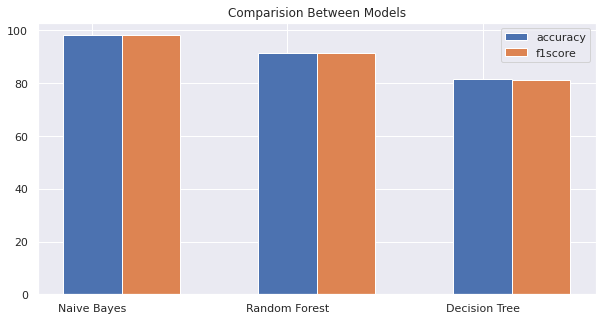

In [26]:
#scores ={"Naive Bayes":98.059  ,"Random Forest":91.4 ,"Decision Tree": 81.5}
plt.figure(figsize=(10,5))
scores=["Naive Bayes","Random Forest","Decision Tree"]
accscore=[98.059,91.4,81.5]
f1score=[98.061,91.5,81.1]
w=0.3
bar1=np.arange(len(scores))
bar2=[i+w for i in bar1]

plt.bar(bar1,accscore,w,label="accuracy")
plt.bar(bar2,f1score,w,label="f1score")
plt.xticks(bar1, scores)
plt.legend()
plt.title("Comparision Between Models")
plt.show()


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.20, 
                                                    random_state=42)
nb_ =MultinomialNB(alpha=0.01)
nb_.fit(X_train, y_train)

y_pred = nb_.predict(X_test)
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    0   0    3
1           0  100   0    0    0   0    6
2           0    0  78    0    0   0    0
3           0    0   0  122    0   0    3
4           0    0   0    0  143   0    6
5           0    0   0    0    0  51    0
6           0    0   0    0    0   0  265


In [28]:
import pickle

In [29]:
# Saving the model for future use.
filename = 'finalized_model.sav'
pickle.dump(nb_, open(filename, 'wb'))

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

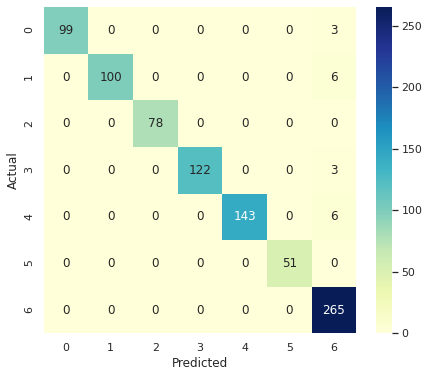

In [30]:
plt.figure(figsize=(7,6))
sns.heatmap(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')),cmap="YlGnBu",annot=True,fmt='d')

##### Using TFIDF Vectorization

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(ngram_range=(4,4))
X_tf = tf.fit_transform(humandata["in_string"])

In [32]:
i=0
for key,value in tf.vocabulary_.items():
    print(f"{key} : {value}")
    i+=1
    if i>10:break

atgccc tgcccc gcccca ccccaa : 52803
tgcccc gcccca ccccaa cccaac : 207969
gcccca ccccaa cccaac ccaact : 136621
ccccaa cccaac ccaact caacta : 79202
cccaac ccaact caacta aactaa : 78295
ccaact caacta aactaa actaaa : 74681
caacta aactaa actaaa ctaaat : 60650
aactaa actaaa ctaaat taaata : 6563
actaaa ctaaat taaata aaatac : 25724
ctaaat taaata aaatac aatact : 101750
taaata aaatac aatact atacta : 176196


In [33]:
print("Naive Bayes Classifier for TFidf:")
for i,(train_index,val_index)  in enumerate(StratifiedKFold(n_splits=5,shuffle=True,random_state=42).split(X_tf,y)):
    classifier = MultinomialNB(alpha=0.1)
    classifier.fit(X[train_index],y[train_index])
    pred=classifier.predict(X[val_index])
    accuracy, precision, recall, f1 = get_metrics(y[val_index], pred)
    print(str(i)+" Iteration : Accuracy = %.5f    F1_Score = %.5f" % (accuracy, f1))

Naive Bayes Classifier for TFidf:
0 Iteration : Accuracy = 0.98059    F1_Score = 0.98061
1 Iteration : Accuracy = 0.98059    F1_Score = 0.98066
2 Iteration : Accuracy = 0.97603    F1_Score = 0.97606
3 Iteration : Accuracy = 0.97717    F1_Score = 0.97722
4 Iteration : Accuracy = 0.97717    F1_Score = 0.97715


In [34]:
print("Random Forest Classifier for Tfidf :")
for i,(train_index,val_index)  in enumerate(StratifiedKFold(n_splits=5,shuffle=True,random_state=42).split(X_tf,y)):
    rf = RandomForestClassifier(n_jobs=-1)
    rf.fit(X[train_index],y[train_index])
    pred=rf.predict(X[val_index])
    accuracy, precision, recall, f1 = get_metrics(y[val_index], pred)
    print(str(i)+" Iteration : Accuracy = %.5f     F1_Score = %.5f" % (accuracy, f1))

Random Forest Classifier for Tfidf :
0 Iteration : Accuracy = 0.91324     F1_Score = 0.91418
1 Iteration : Accuracy = 0.92580     F1_Score = 0.92610
2 Iteration : Accuracy = 0.89384     F1_Score = 0.89758
3 Iteration : Accuracy = 0.91895     F1_Score = 0.92033
4 Iteration : Accuracy = 0.90982     F1_Score = 0.91009


### Validating our Model on  Chimpanzee data and Dog Data

In [35]:
chimp = pd.read_table('../input/chimpanzee-and-dog-dna/chimp_data.txt')
dog = pd.read_table('../input/chimpanzee-and-dog-dna/dog_data.txt')
chimp.head()
dog.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


In [36]:
chimp['words'] = chimp.apply(lambda x: getKmers(x['sequence']), axis=1)
dog['words'] = dog.apply(lambda x: getKmers(x['sequence']), axis=1)

In [37]:
chimp_texts = list(chimp['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
y_c = chimp.iloc[:, 1].values                       # y_c for chimp

dog_texts = list(dog['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
y_d = dog.iloc[:, 1].values        

In [38]:
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

In [39]:
print(X_chimp.shape)
print(X_dog.shape)

(1682, 232414)
(820, 232414)


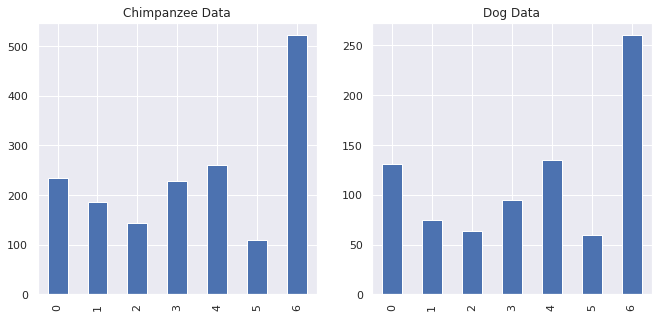

In [40]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
chimp['class'].value_counts().sort_index().plot.bar()
plt.title("Chimpanzee Data");
plt.subplot(1,2,2)
dog['class'].value_counts().sort_index().plot.bar()
plt.title("Dog Data");

In [41]:
# Predicting the chimp, dog and worm sequences
y_pred_chimp = nb_.predict(X_chimp)
y_pred_dog = nb_.predict(X_dog)

## Performance on Chimpanzee's Gene

In [42]:

print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_c, name='Actual'), pd.Series(y_pred_chimp, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_c, y_pred_chimp)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted    0    1    2    3    4    5    6
Actual                                      
0          231    0    0    0    0    0    3
1            0  179    0    0    0    0    6
2            0    0  144    0    0    0    0
3            0    0    0  225    0    0    3
4            1    0    0    0  253    0    7
5            0    0    0    0    0  109    0
6            0    0    0    0    0    0  521
accuracy = 0.988 
precision = 0.989 
recall = 0.988 
f1 = 0.988


## Performance on Dog's Gene

In [43]:

print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_d, name='Actual'), pd.Series(y_pred_dog, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_d, y_pred_dog)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted    0   1   2   3    4   5    6
Actual                                  
0          124   0   0   0    0   0    7
1            0  52   0   0    0   0   23
2            0   0  43   0    0   0   21
3            1   0   0  64    1   0   29
4            0   0   0   0  110   0   25
5            0   0   0   0    0  40   20
6            0   0   0   0    0   0  260
accuracy = 0.845 
precision = 0.894 
recall = 0.845 
f1 = 0.847


## Inference :
The model seems to perform well on human data. It also does on Chimpanzee. That might not be a surprize since the chimp and human are so similar genetically. The performance on dog is not quite as good. We would expect this since the dog is more divergent from human than the chimpanze.

Thanks to Mr.Krish Naik for inspiration to work on this Data

## Do Upvote this Notebook if you like it.
## Thanks !